In [1]:
import os
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
np.random.seed(0)

In [2]:
(x_train , y_train),(x_test , y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


Text(0.5, 1.0, 'Distribution of the training dataset')

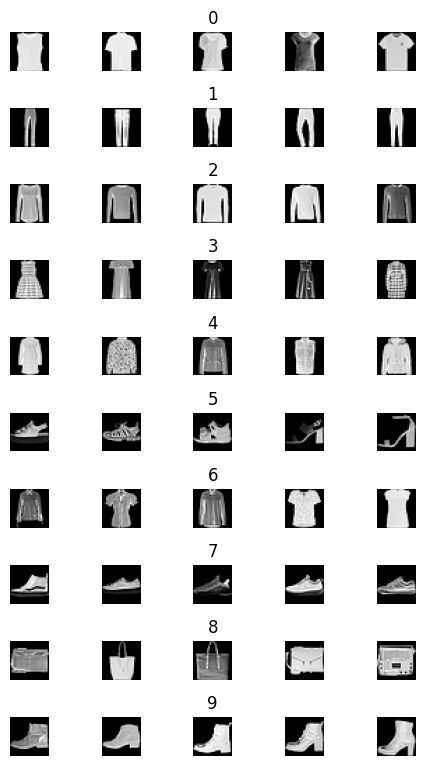

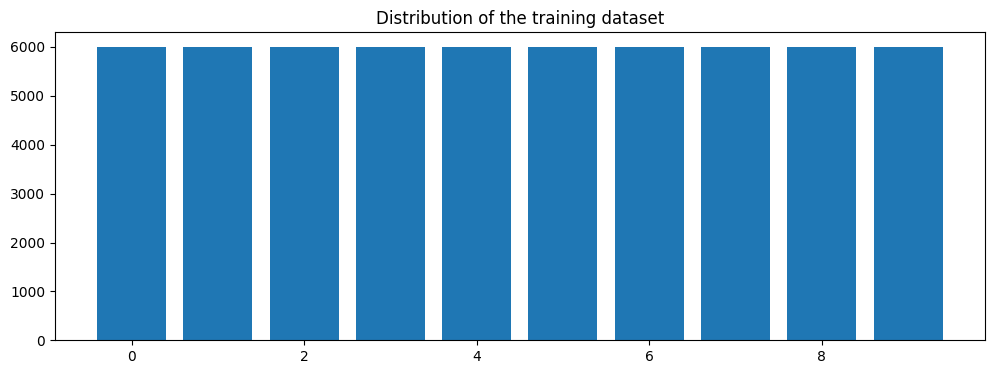

In [3]:
samples = [] #it will store the number of samples of each class

cols = 5
classes = 10

fig , axs = plt.subplots(nrows = classes , ncols = cols , figsize = (5,8))
for i in range(cols):
  for j in range(classes):
    x_selected = x_train[y_train == j]
    axs[j][i].imshow(x_selected[(random.randint(0 , len(x_selected)-1)),: , :],cmap = plt.get_cmap('gray'))
    fig.tight_layout()
    axs[j][i].axis('off')
    if i == 2:
      axs[j][i].set_title(str(j))
      samples.append(len(x_selected))
print(samples)
plt.figure(figsize = (12,4))
plt.bar(range(0,classes),samples)
plt.title('Distribution of the training dataset')

In [4]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [5]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [6]:
def Lenet_model():
  model = Sequential()

  model.add(Conv2D(30,(5,5),input_shape = (28,28,1),activation = 'relu'))
  model.add(Conv2D(30,(5,5),activation = 'relu'))

  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Conv2D(15,(5,5),activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  model.add(Flatten())
  model.add(Dense(200,activation = 'relu'))
  model.add(Dense(100,activation = 'relu'))

  model.add(Dense(classes , activation = 'softmax'))
  model.compile(Adam(learning_rate = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])

  return model


In [7]:
model = Lenet_model()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 30)        22530     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 30)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 15)          11265     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 15)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 135)               0

In [9]:
history = model.fit(x_train , y_train ,validation_split = 0.1 , epochs = 10 , batch_size = 400 , verbose = 2 , shuffle = 1)

Epoch 1/10
135/135 - 138s - loss: 1.8624 - accuracy: 0.5059 - val_loss: 0.5912 - val_accuracy: 0.7730 - 138s/epoch - 1s/step
Epoch 2/10
135/135 - 136s - loss: 0.5521 - accuracy: 0.7893 - val_loss: 0.5086 - val_accuracy: 0.8063 - 136s/epoch - 1s/step
Epoch 3/10
135/135 - 131s - loss: 0.5002 - accuracy: 0.8109 - val_loss: 0.4561 - val_accuracy: 0.8237 - 131s/epoch - 970ms/step
Epoch 4/10
135/135 - 143s - loss: 0.4607 - accuracy: 0.8229 - val_loss: 0.4562 - val_accuracy: 0.8285 - 143s/epoch - 1s/step
Epoch 5/10
135/135 - 130s - loss: 0.4376 - accuracy: 0.8327 - val_loss: 0.4426 - val_accuracy: 0.8277 - 130s/epoch - 961ms/step
Epoch 6/10
135/135 - 133s - loss: 0.4268 - accuracy: 0.8363 - val_loss: 0.4539 - val_accuracy: 0.8320 - 133s/epoch - 988ms/step
Epoch 7/10
135/135 - 132s - loss: 0.4107 - accuracy: 0.8419 - val_loss: 0.4101 - val_accuracy: 0.8495 - 132s/epoch - 981ms/step
Epoch 8/10
135/135 - 136s - loss: 0.3912 - accuracy: 0.8516 - val_loss: 0.4128 - val_accuracy: 0.8442 - 136s/epoc

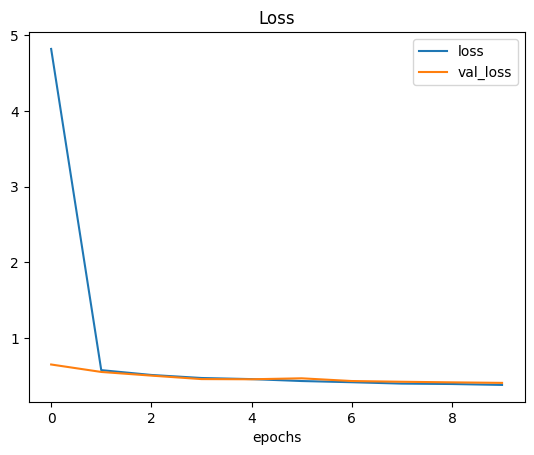

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.legend(['loss' , 'val_loss'])

Text(0.5, 0, 'epochs')

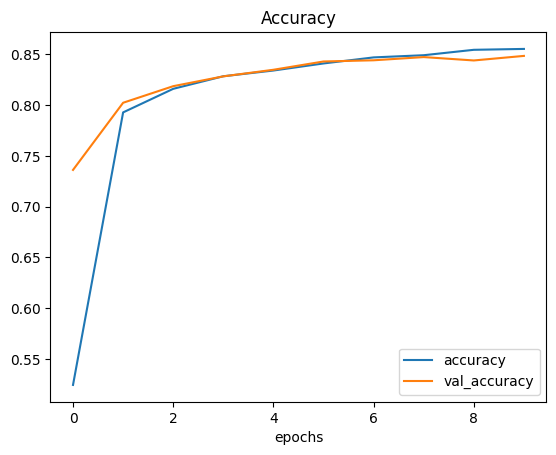

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['accuracy' , 'val_accuracy'])
plt.xlabel('epochs')

In [ ]:
from google.colab import files
upload = files.upload()

Saving sample_image.webp to sample_image.webp


In [ ]:
d = list(upload.keys())[0]
print(d)

sample_image.webp


In [ ]:
a = np.fromstring(upload[d] , np.uint8)
print(a)

[ 82  73  70 ... 189   0   0]


<ipython-input-31-12a4598a8726>:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a = np.fromstring(upload[d] , np.uint8)


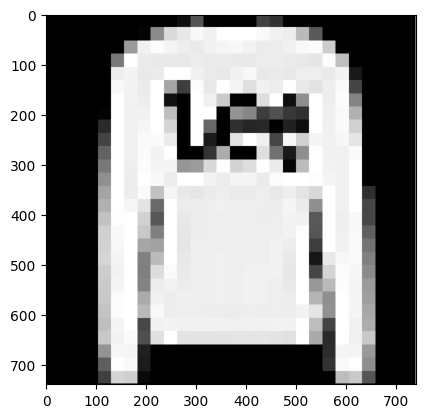

In [ ]:
img = cv2.imdecode(a , cv2.IMREAD_COLOR)
plt.imshow(img,cmap = plt.get_cmap('gray'))

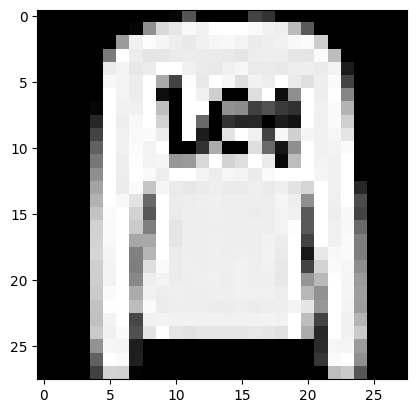

In [ ]:
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(img , cmap = plt.get_cmap('gray'))

In [1]:
img = img.reshape(1,28,28,1)
img = img/255
prediction = model.predict(img)
print(str(prediction))

NameError: name 'img' is not defined